In [1]:
import deeplake

In [2]:
ds = deeplake.load("hub://activeloop/diabetic-retinopathy-detection-train")

hub://activeloop/diabetic-retinopathy-detection-train loaded successfully.

This dataset can be visualized in Jupyter Notebook by ds.visualize() or at https://app.activeloop.ai/activeloop/diabetic-retinopathy-detection-train



In [3]:
dataloader = ds.pytorch(num_workers=0, batch_size=1, shuffle=False)

/home/ravikumar/miniconda3/envs/pytorch_p39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/ravikumar/miniconda3/envs/pytorch_p39/lib/python3.9/site-packages/deeplake/integrations/pytorch/common.py:91: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(


In [32]:
from tqdm import tqdm
import torch

In [29]:
len(dataloader)

33699

In [41]:
for idx,i in enumerate(tqdm(dataloader,total= len(dataloader),postfix=f"{len(dataloader)}")):
    moderate_count = 0
    no_dr_count = 0
    if i['labels'].item() == 2:
        moderate_count += 1
        image = i['images'].squeeze(0)
        torch.save({
            "moderate":{
                f"image_{moderate_count}":image,
            }
        },"moderate_image_tensors.pt")
    elif i["labels"].item() == 0:
        no_dr_count += 1
        image = i['images'].squeeze(0)
        torch.save({
            "no_dr":{
                f"image_{no_dr_count}":image,
            }
        },"no_dr_image_tensors.pt")
    else:
        pass

  0%|          | 0/33699 [00:00<?, ?it/s, 33699]/home/ravikumar/miniconda3/envs/pytorch_p39/lib/python3.9/site-packages/deeplake/integrations/pytorch/common.py:91: UserWarning: Decode method for tensors ['images'] is defaulting to numpy. Please consider specifying a decode_method in .pytorch() that maximizes the data preprocessing speed based on your transformation.
  warnings.warn(
  0%|          | 161/33699 [02:43<8:10:43,  1.14it/s, 33699] 

In [9]:
i

IterableOrderedDict([('images',
                      tensor([[[[0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0],
                                ...,
                                [0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0]],
                      
                               [[0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0],
                                ...,
                                [0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0]],
                      
                               [[0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0],
                                ...,
                                [0, 0, 0],
                                [0, 0, 0],
                                [0, 0, 0]],
                      
           

In [1]:
import torch

/home/ravikumar/miniconda3/envs/pytorch_p39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
import matplotlib.pyplot as plt

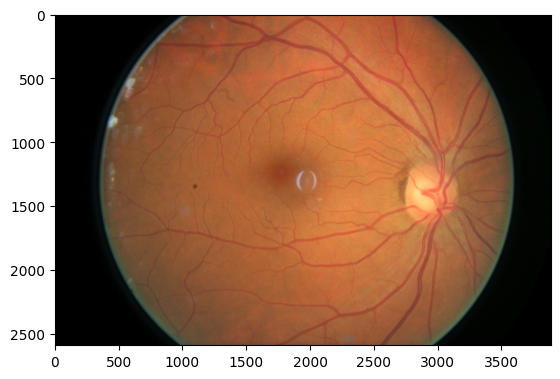

In [14]:
plt.imshow(i['images'].squeeze(0))

In [17]:
moderate_image_tensors = torch.load("no_dr_image_tensors(1).pt")

In [20]:
moderate_image_tensors['no_dr']

1

In [1]:
import os
import shutil

In [5]:
images = os.listdir("images/normal") 

FileNotFoundError: [Errno 2] No such file or directory: 'images/normal'

In [4]:

images = [f for f in os.listdir() if '.jpg' in f.lower()]


FileNotFoundError: [Errno 2] No such file or directory: 'images'

In [3]:
images

[]

In [ ]:
os.mkdir('downloaded_images')

for image in images:
    new_path = 'downloaded_images/' + image
    shutil.move(image, new_path)